In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Conv1D, MaxPooling1D, BatchNormalization, Flatten, GRU
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

/Users/nehakolambe/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
original_df=pd.read_excel('data/old_dataset.xlsx')
new_df=pd.read_excel('data/new_dataset.xlsx')

In [5]:
original_df.columns

Index(['unnamed:_0.1', 'duration_(ms)', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'spec_rate', 'labels', 'spotify_uri'],
      dtype='object')

In [6]:
new_df.columns

Index(['unnamed:_0.1', 'duration_(ms)', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'spec_rate', 'labels', 'spotify_uri', 'track_name',
       'artist_name', 'url_lastfm', 'id_dataset', 'country', 'ballad', 'folk',
       'alternative', 'pop', 'acoustic', 'soul', 'love', 'electronic',
       'instrumental', 'rap', 'jam', 'melancholy', 'melancholic',
       'psychedelic', 'ambient', 'piano', 'drama', 'glitch', 'neoclassical',
       'dark', 'techno', 'progressive', 'hardcore', 'steampunk', 'cabaret',
       'orchestral', 'cello', 'baroque', 'cinematic', 'renaissance', 'chant',
       'choral', 'yule', 'id', 'zero_crossing_rate', 'spectral_centroid',
       'spectral_bandwidth', 'spectral_rolloff', 'spectral_contrast',
       'mfcc_mean', 'chroma_stft_mean', 'tonnetz_mean', 'rms_energy',
       'file_name'],
      dtype='object')

In [7]:
original_df = original_df.drop(columns=['unnamed:_0.1', 'duration_(ms)','spotify_uri'])

In [8]:
new_df=new_df.drop(columns=['unnamed:_0.1','duration_(ms)','spotify_uri','track_name','artist_name','url_lastfm','id_dataset','id','file_name'])

In [9]:
original_y = original_df[['labels']]

In [10]:
new_y = new_df[['labels']]

In [11]:
original_df.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'spec_rate',
       'labels'],
      dtype='object')

In [12]:
new_df.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'spec_rate',
       'labels', 'country', 'ballad', 'folk', 'alternative', 'pop', 'acoustic',
       'soul', 'love', 'electronic', 'instrumental', 'rap', 'jam',
       'melancholy', 'melancholic', 'psychedelic', 'ambient', 'piano', 'drama',
       'glitch', 'neoclassical', 'dark', 'techno', 'progressive', 'hardcore',
       'steampunk', 'cabaret', 'orchestral', 'cello', 'baroque', 'cinematic',
       'renaissance', 'chant', 'choral', 'yule', 'zero_crossing_rate',
       'spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff',
       'spectral_contrast', 'mfcc_mean', 'chroma_stft_mean', 'tonnetz_mean',
       'rms_energy'],
      dtype='object')

In [13]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [17]:
original_X = original_df.drop(columns=['labels'])  # Drop 'labels' column from X
original_y = original_df['labels']  # Use 'labels' column as y (output)
# Standardize the data
scaler = StandardScaler()
original_X_scaled = scaler.fit_transform(original_X)

# Reshape X for LSTM model [samples, timesteps, features]
original_X_scaled = original_X_scaled.reshape(original_X_scaled.shape[0], 1, original_X_scaled.shape[1])


new_X = new_df.drop(columns=['labels'])  # Drop 'labels' column from X
new_y = new_df['labels']  # Use 'labels' column as y (output)

# Standardize the data
scaler = StandardScaler()
new_X_scaled = scaler.fit_transform(new_X)

# Reshape X for LSTM model [samples, timesteps, features]
new_X_scaled = new_X_scaled.reshape(new_X_scaled.shape[0], 1, new_X_scaled.shape[1])

# LSTM

/Users/nehakolambe/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 128)         │        71,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,996 (488.27 KB)

 Trainable params: 124,996 (488.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4377 - loss: 1.3373 - val_accuracy: 0.3559 - val_loss: 1.1506
Epoch 2/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6734 - loss: 0.8370 - val_accuracy: 0.7888 - val_loss: 0.4181
Epoch 3/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7762 - loss: 0.5704 - val_accuracy: 0.8798 - val_loss: 0.2308
Epoch 4/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7865 - loss: 0.5063 - val_accuracy: 0.8623 - val_loss: 0.2715
Epoch 5/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8065 - loss: 0.4725 - val_accuracy: 0.8670 - val_loss: 0.2686
Epoch 6/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8138 - loss: 0.4557 - val_accuracy: 0.8938 - val_loss: 0.2185
Epoch 7/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8099 - loss: 0.4638 - val_accuracy: 0.8658 - val_loss: 0.2611
Epoch 8/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8171 - loss: 0.4513 - val_accuracy: 0.8996 - val_loss:

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Accuracy: 0.88


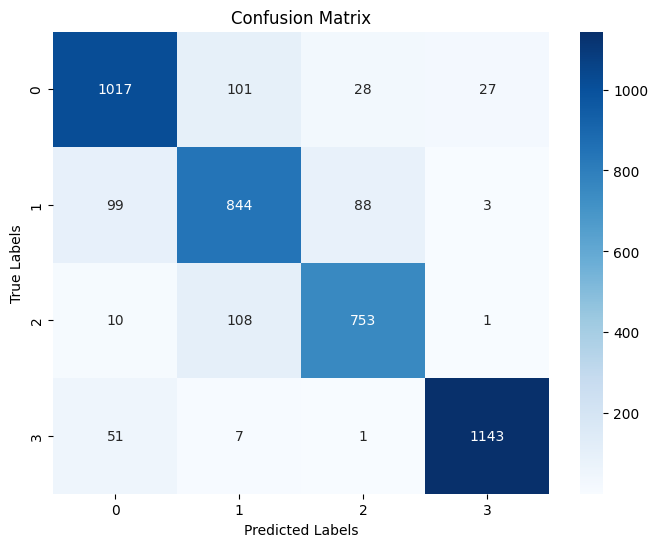

In [18]:
# Define More Complex LSTM Model
original_model = Sequential()

# First LSTM Layer with Dropout
original_model.add(LSTM(128, activation='relu', input_shape=(original_X_scaled.shape[1], original_X_scaled.shape[2]), return_sequences=True))
original_model.add(Dropout(0.2))  # Dropout for regularization

# # Second LSTM Layer with Dropout
# model.add(LSTM(128, activation='relu', return_sequences=True))
# model.add(Dropout(0.2))

# Third LSTM Layer
original_model.add(LSTM(64, activation='relu'))
original_model.add(Dropout(0.2))

# Fully Connected Layer
original_model.add(Dense(64, activation='relu'))
original_model.add(Dropout(0.2))  # Dropout for regularization

# Output Layer with 4 neurons (for 4 classes)
original_model.add(Dense(4, activation='softmax'))  # Using softmax for multi-class classification

# Compile the model
original_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
original_model.summary()

# Train the model
original_model.fit(original_X_scaled, original_y, epochs=25, batch_size=64, validation_split=0.2)

# Save model after training
original_model.save('models/lstm_old_dataset_model.h5')
original_y_pred = original_model.predict(original_X_scaled)
original_y_pred_classes = np.argmax(original_y_pred, axis=1)  # Convert predictions to class labels (0, 1, 2, or 3)

# Compute confusion matrix
original_cm = confusion_matrix(original_y, original_y_pred_classes)

# Calculate accuracy directly
accuracy = accuracy_score(original_y, original_y_pred_classes)
print(f"Accuracy: {accuracy:.2f}")

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(original_cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3], cbar=True)

# Labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

/Users/nehakolambe/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 1, 128)         │        93,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 147,012 (574.27 KB)

 Trainable params: 147,012 (574.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4103 - loss: 1.3333 - val_accuracy: 0.6593 - val_loss: 0.8363
Epoch 2/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6761 - loss: 0.7677 - val_accuracy: 0.7748 - val_loss: 0.5355
Epoch 3/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7687 - loss: 0.5514 - val_accuracy: 0.8448 - val_loss: 0.3778
Epoch 4/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7932 - loss: 0.5084 - val_accuracy: 0.8471 - val_loss: 0.3793
Epoch 5/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8041 - loss: 0.4780 - val_accuracy: 0.8740 - val_loss: 0.3077
Epoch 6/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8001 - loss: 0.4747 - val_accuracy: 0.8483 - val_loss: 0.3654
Epoch 7/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8193 - loss: 0.4473 - val_accuracy: 0.8506 - val_loss: 0.3756
Epoch 8/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8440 - loss: 0.4154 - val_accuracy: 0.8541 - val_loss:

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Accuracy: 0.91


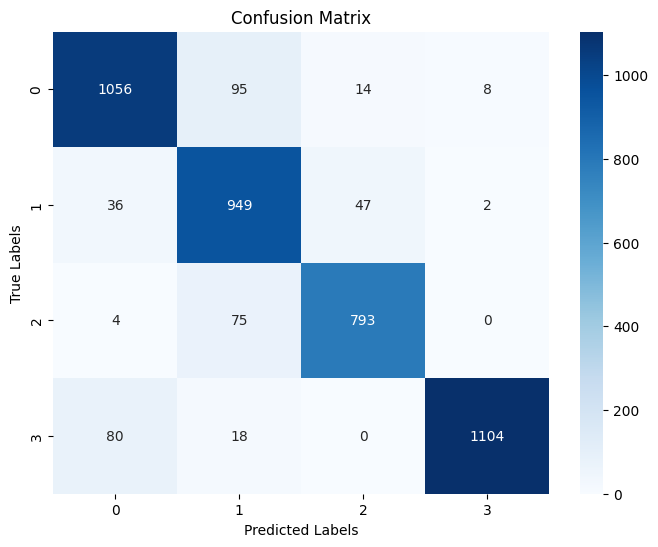

In [19]:
# Define More Complex LSTM Model
new_model = Sequential()

# First LSTM Layer with Dropout
new_model.add(LSTM(128, activation='relu', input_shape=(new_X_scaled.shape[1], new_X_scaled.shape[2]), return_sequences=True))
new_model.add(Dropout(0.2))  # Dropout for regularization

# # Second LSTM Layer with Dropout
# model.add(LSTM(128, activation='relu', return_sequences=True))
# model.add(Dropout(0.2))

# Third LSTM Layer
new_model.add(LSTM(64, activation='relu'))
new_model.add(Dropout(0.2))

# Fully Connected Layer
new_model.add(Dense(64, activation='relu'))
new_model.add(Dropout(0.2))  # Dropout for regularization

# Output Layer with 4 neurons (for 4 classes)
new_model.add(Dense(4, activation='softmax'))  # Using softmax for multi-class classification

# Compile the model
new_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
new_model.summary()

# Train the model
new_model.fit(new_X_scaled, new_y, epochs=25, batch_size=64, validation_split=0.2)

# Save model after training
new_model.save('models/lstm_new_dataset_model.h5')

new_y_pred = new_model.predict(new_X_scaled)
new_y_pred_classes = np.argmax(new_y_pred, axis=1)  # Convert predictions to class labels (0, 1, 2, or 3)

# Compute confusion matrix
new_cm = confusion_matrix(new_y, new_y_pred_classes)

# Calculate accuracy directly
accuracy = accuracy_score(new_y, new_y_pred_classes)
print(f"Accuracy: {accuracy:.2f}")

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(new_cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3], cbar=True)

# Labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

# RCNN

/Users/nehakolambe/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 8, 64)          │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,700 (147.27 KB)

 Trainable params: 37,700 (147.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4048 - loss: 1.3182 - val_accuracy: 0.0000e+00 - val_loss: 1.8658
Epoch 2/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5693 - loss: 1.0054 - val_accuracy: 0.7981 - val_loss: 0.6289
Epoch 3/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6782 - loss: 0.7535 - val_accuracy: 0.7736 - val_loss: 0.6864
Epoch 4/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7394 - loss: 0.6360 - val_accuracy: 0.7748 - val_loss: 0.6766
Epoch 5/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7655 - loss: 0.5699 - val_accuracy: 0.8261 - val_loss: 0.5052
Epoch 6/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7672 - loss: 0.5510 - val_accuracy: 0.8168 - val_loss: 0.5822
Epoch 7/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7868 - loss: 0.5224 - val_accuracy: 0.8611 - val_loss: 0.3888
Epoch 8/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7784 - loss: 0.5315 - val_accuracy: 0.8448 - val_l

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step
Accuracy: 0.84


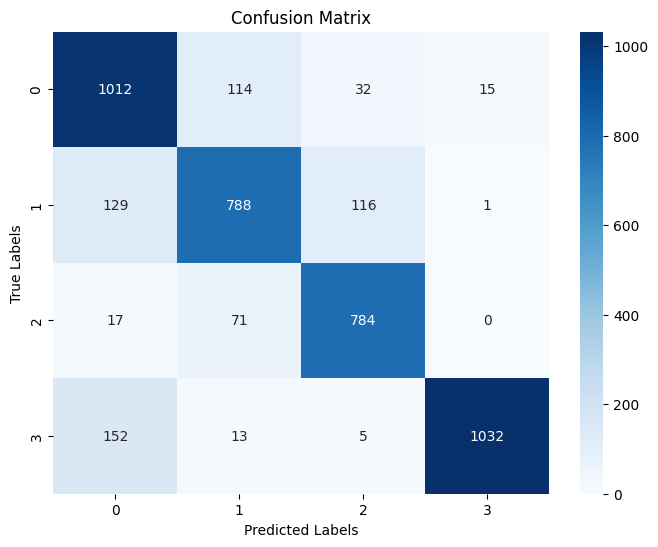

In [20]:
# Dummy input data
batch_size = None
sequence_length = 53
num_features = 128
num_classes = 4

# Define the RCNN model
original_model = Sequential()

# 1D Convolutional layer
original_X_scaled1 = original_X_scaled.reshape(original_X_scaled.shape[0], original_X_scaled.shape[2], 1)
original_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(10, 1)))
original_model.add(MaxPooling1D(pool_size=2))

# LSTM Layer
# new_model.add(LSTM(128, activation='relu', return_sequences=True))
# new_model.add(Dropout(0.2))

# Another LSTM Layer
original_model.add(LSTM(64, activation='relu'))
original_model.add(Dropout(0.1))

# Fully Connected Layer
original_model.add(Dense(64, activation='relu'))
original_model.add(Dropout(0.1))

# Output Layer for multi-class classification
original_model.add(Dense(4, activation='softmax'))

# Compile the model
original_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
original_model.summary()

# Train the model
original_model.fit(original_X_scaled1, original_y, epochs=25, batch_size=64, validation_split=0.2)

# Save model after training
original_model.save('models/rcnn_old_dataset_model.h5')

original_y_pred = original_model.predict(original_X_scaled1)
original_y_pred_classes = np.argmax(original_y_pred, axis=1)  # Convert predictions to class labels (0, 1, 2, or 3)

# Compute confusion matrix
original_cm = confusion_matrix(original_y, original_y_pred_classes)

# Calculate accuracy directly
accuracy = accuracy_score(original_y, original_y_pred_classes)
print(f"Accuracy: {accuracy:.2f}")

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(original_cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3], cbar=True)

# Labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

/Users/nehakolambe/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 51, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 25, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 23, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 23, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 11, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 9, 64)          │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 9, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 4, 128)         │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 4, 64)          │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 223,748 (874.02 KB)

 Trainable params: 223,364 (872.52 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.3176 - loss: 1.3196 - val_accuracy: 0.0000e+00 - val_loss: 1.4962
Epoch 2/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4681 - loss: 1.0886 - val_accuracy: 0.8471 - val_loss: 1.2773
Epoch 3/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6659 - loss: 0.7829 - val_accuracy: 0.8343 - val_loss: 0.9742
Epoch 4/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7553 - loss: 0.6310 - val_accuracy: 0.6896 - val_loss: 0.9660
Epoch 5/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7779 - loss: 0.5513 - val_accuracy: 0.7550 - val_loss: 0.8537
Epoch 6/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8203 - loss: 0.4918 - val_accuracy: 0.7841 - val_loss: 0.6905
Epoch 7/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8185 - loss: 0.4762 - val_accuracy: 0.8506 - val_loss: 0.5250
Epoch 8/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8285 - loss: 0.4651 - val_accuracy: 0.8856 - val

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 0.87


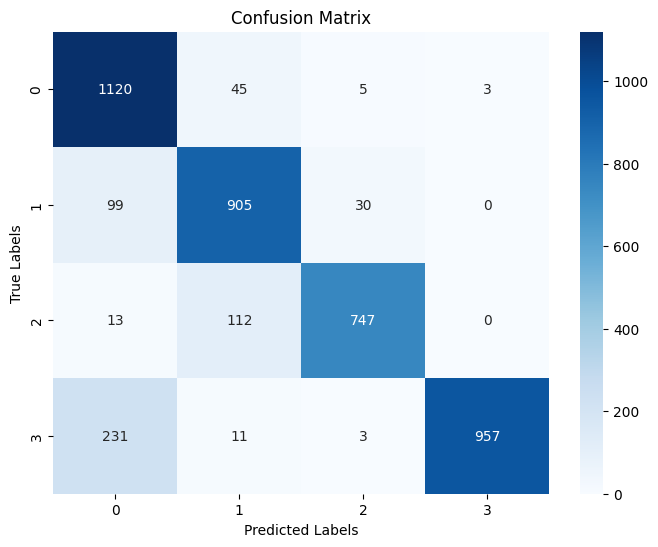

In [21]:
# Dummy input data
batch_size = None
sequence_length = 53
num_features = 128
num_classes = 4

# Simulate data of shape (samples, 1, sequence_length, num_features)
# new_X_scaled = np.random.rand(1000, 1, sequence_length, num_features)  # Example 4D data
# new_X_scaled = new_X_scaled.reshape(-1, sequence_length, num_features)  # Reshape to 3D

# new_y = np.random.randint(0, num_classes, 1000)  # Example labels
# new_y_encoded = tf.keras.utils.to_categorical(new_y, num_classes)

# Define the RCNN model
new_model = Sequential()

# 1D Convolutional layer
new_X_scaled1 = new_X_scaled.reshape(new_X_scaled.shape[0], new_X_scaled.shape[2], 1)
new_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(53, 1)))
new_model.add(MaxPooling1D(pool_size=2))

# First Conv1D layer
new_model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(new_X_scaled.shape[1], new_X_scaled.shape[2])))
new_model.add(BatchNormalization())
new_model.add(MaxPooling1D(pool_size=2))

# Second Conv1D layer
new_model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
new_model.add(BatchNormalization())
new_model.add(MaxPooling1D(pool_size=2))

# First LSTM Layer with Dropout
new_model.add(LSTM(128, activation='relu', return_sequences=True))
new_model.add(Dropout(0.3))

# Second LSTM Layer with Dropout
new_model.add(LSTM(64, activation='relu', return_sequences=True))
new_model.add(Dropout(0.3))

# Third LSTM Layer with Dropout
new_model.add(LSTM(32, activation='relu', return_sequences=False))
new_model.add(Dropout(0.3))

# Fully Connected Layer
new_model.add(Dense(128, activation='relu'))
new_model.add(Dropout(0.3))

# Second Fully Connected Layer
new_model.add(Dense(64, activation='relu'))
new_model.add(Dropout(0.2))

# Output Layer for multi-class classification
new_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
new_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
new_model.summary()

# Train the model
new_model.fit(new_X_scaled1, new_y, epochs=25, batch_size=64, validation_split=0.2)

# Save model after training
new_model.save('models/rcnn_new_dataset_model.h5')

new_y_pred = new_model.predict(new_X_scaled1)
new_y_pred_classes = np.argmax(new_y_pred, axis=1)  # Convert predictions to class labels (0, 1, 2, or 3)

# Compute confusion matrix
new_cm = confusion_matrix(new_y, new_y_pred_classes)

# Calculate accuracy directly
accuracy = accuracy_score(new_y, new_y_pred_classes)
print(f"Accuracy: {accuracy:.2f}")

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(new_cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3], cbar=True)

# Labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

# ANN

/Users/nehakolambe/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 256)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,684 (92.52 KB)

 Trainable params: 23,684 (92.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5085 - loss: 1.1380 - val_accuracy: 0.9172 - val_loss: 0.2681
Epoch 2/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7744 - loss: 0.5656 - val_accuracy: 0.9195 - val_loss: 0.2199
Epoch 3/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7839 - loss: 0.5135 - val_accuracy: 0.9697 - val_loss: 0.1183
Epoch 4/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8014 - loss: 0.5002 - val_accuracy: 0.9370 - val_loss: 0.1922
Epoch 5/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8324 - loss: 0.4305 - val_accuracy: 0.9405 - val_loss: 0.1646
Epoch 6/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8189 - loss: 0.4481 - val_accuracy: 0.9382 - val_loss: 0.1655
Epoch 7/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8299 - loss: 0.4181 - val_accuracy: 0.9102 - val_loss: 0.2133
Epoch 8/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8210 - loss: 0.4281 - val_accuracy: 0.9113 - val_loss:

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
Accuracy: 0.89


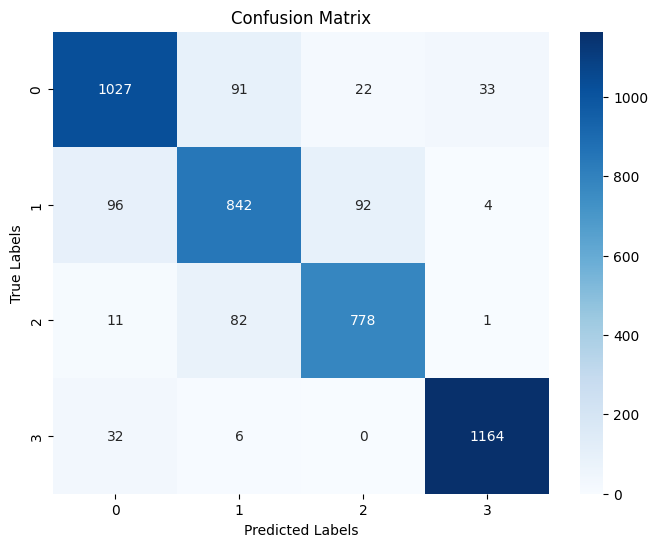

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


sequence_length = 10
# Define the ANN model
ann_model = Sequential()

# First Dense Layer (equivalent to the first RNN layer with 256 units)
ann_model.add(Dense(256, activation='relu', input_shape=(sequence_length,)))
ann_model.add(Dropout(0.2))

# Second Dense Layer (equivalent to the second RNN layer with 64 units)
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dropout(0.2))

# Third Dense Layer (equivalent to the dense layer in the RNN model)
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dropout(0.2))

# Output Layer for multi-class classification
ann_model.add(Dense(4, activation='softmax'))

# Compile the model
ann_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
ann_model.summary()

# Train the model
ann_model.fit(original_X_scaled1, original_y, epochs=25, batch_size=64, validation_split=0.2)

# Save model after training
ann_model.save('models/ann_old_dataset_model.h5')

original_y_pred = ann_model.predict(original_X_scaled1)
original_y_pred_classes = np.argmax(original_y_pred, axis=1)  # Convert predictions to class labels (0, 1, 2, or 3)

# Compute confusion matrix
original_cm = confusion_matrix(original_y, original_y_pred_classes)

# Calculate accuracy directly
accuracy = accuracy_score(original_y, original_y_pred_classes)
print(f"Accuracy: {accuracy:.2f}")

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(original_cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3], cbar=True)

# Labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

/Users/nehakolambe/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 512)            │        27,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 202,340 (790.39 KB)

 Trainable params: 202,340 (790.39 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4283 - loss: 1.2597 - val_accuracy: 0.8471 - val_loss: 0.5874
Epoch 2/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7093 - loss: 0.7717 - val_accuracy: 0.8226 - val_loss: 0.4595
Epoch 3/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7474 - loss: 0.6511 - val_accuracy: 0.8681 - val_loss: 0.3839
Epoch 4/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7683 - loss: 0.5695 - val_accuracy: 0.9032 - val_loss: 0.2715
Epoch 5/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7941 - loss: 0.5437 - val_accuracy: 0.9172 - val_loss: 0.2316
Epoch 6/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8043 - loss: 0.5069 - val_accuracy: 0.9440 - val_loss: 0.1628
Epoch 7/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8219 - loss: 0.4695 - val_accuracy: 0.9417 - val_loss: 0.1625
Epoch 8/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8144 - loss: 0.4760 - val_accuracy: 0.9358 - val_loss:

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step
Accuracy: 0.94


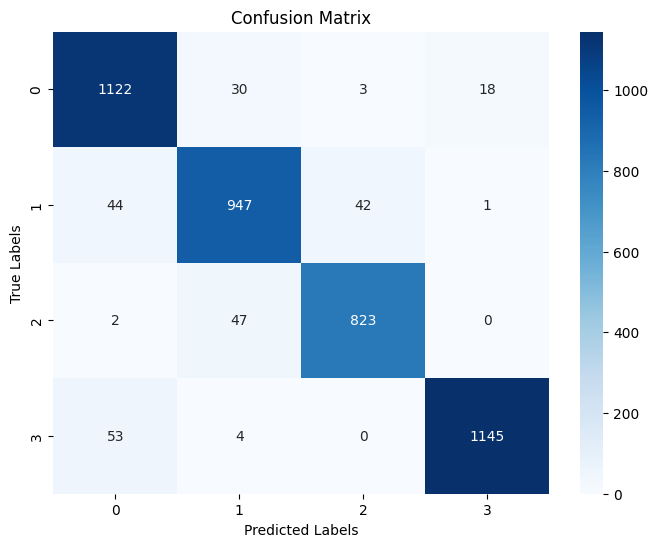

In [23]:
sequence_length = 53

# Define the updated ANN model
ann_model = Sequential()

# First Dense Layer
ann_model.add(Dense(512, activation='relu', input_shape=(sequence_length,)))
ann_model.add(Dropout(0.3))

# Second Dense Layer
ann_model.add(Dense(256, activation='relu'))
ann_model.add(Dropout(0.3))

# Third Dense Layer
ann_model.add(Dense(128, activation='relu'))
ann_model.add(Dropout(0.3))

# Fourth Dense Layer
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dropout(0.2))

# Fifth Dense Layer
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dropout(0.2))

# Output Layer for multi-class classification
ann_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
ann_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
ann_model.summary()

# Train the model
ann_model.fit(new_X_scaled1, new_y, epochs=30, batch_size=64, validation_split=0.2)

# Save model after training
ann_model.save('models/ann_new_dataset_model.h5')

new_y_pred = ann_model.predict(new_X_scaled1)
new_y_pred_classes = np.argmax(new_y_pred, axis=1)  # Convert predictions to class labels (0, 1, 2, or 3)

# Compute confusion matrix
new_cm = confusion_matrix(new_y, new_y_pred_classes)

# Calculate accuracy directly
accuracy = accuracy_score(new_y, new_y_pred_classes)
print(f"Accuracy: {accuracy:.2f}")

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(new_cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3], cbar=True)

# Labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

# CNN

/Users/nehakolambe/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)               │ (None, 8, 128)         │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 4, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 2, 64)          │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,572 (115.52 KB)

 Trainable params: 29,572 (115.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4273 - loss: 1.2075 - val_accuracy: 0.8320 - val_loss: 0.5019
Epoch 2/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6892 - loss: 0.7592 - val_accuracy: 0.8320 - val_loss: 0.5111
Epoch 3/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7526 - loss: 0.6295 - val_accuracy: 0.8763 - val_loss: 0.3439
Epoch 4/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7647 - loss: 0.5854 - val_accuracy: 0.7993 - val_loss: 0.5771
Epoch 5/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7837 - loss: 0.5497 - val_accuracy: 0.8390 - val_loss: 0.4431
Epoch 6/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7999 - loss: 0.5019 - val_accuracy: 0.8565 - val_loss: 0.4207
Epoch 7/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7899 - loss: 0.5228 - val_accuracy: 0.8950 - val_loss: 0.2759
Epoch 8/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8084 - loss: 0.4883 - val_accuracy: 0.8775 - val_loss:

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step
Accuracy: 0.86


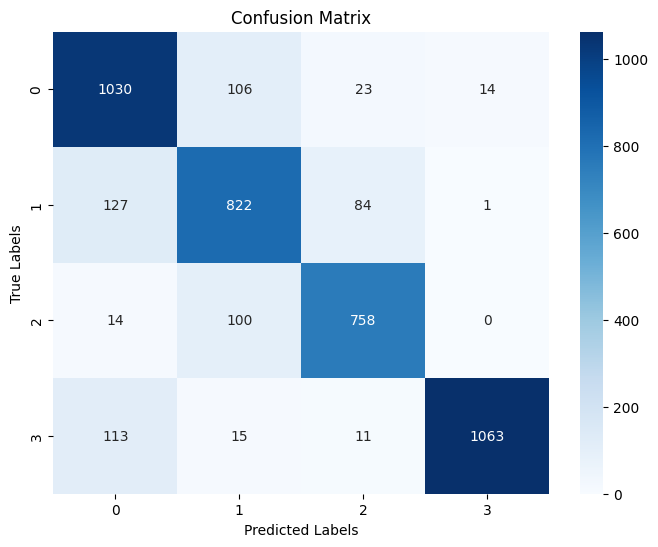

In [24]:
sequence_length = 10
num_classes = 4

# Define the CNN model
cnn_model = Sequential()

# First Convolutional Layer
cnn_model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(sequence_length, 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.2))

# Second Convolutional Layer
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.2))

# Flatten layer to transition to dense layers
cnn_model.add(Flatten())

# Fully Connected Dense Layer
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.2))

# Output Layer for multi-class classification
cnn_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
cnn_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
cnn_model.summary()

# Reshape input data to add a channel dimension
original_X_scaled1 = original_X_scaled1.reshape((-1, sequence_length, 1))

# Train the model
cnn_model.fit(original_X_scaled1, original_y, epochs=25, batch_size=64, validation_split=0.2)

# Save model after training
cnn_model.save('models/cnn_old_dataset_model.h5')

original_y_pred = cnn_model.predict(original_X_scaled1)
original_y_pred_classes = np.argmax(original_y_pred, axis=1)  # Convert predictions to class labels (0, 1, 2, or 3)

# Compute confusion matrix
original_cm = confusion_matrix(original_y, original_y_pred_classes)

# Calculate accuracy directly
accuracy = accuracy_score(original_y, original_y_pred_classes)
print(f"Accuracy: {accuracy:.2f}")

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(original_cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3], cbar=True)

# Labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

/Users/nehakolambe/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)               │ (None, 51, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 25, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 25, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,652 (201.77 KB)

 Trainable params: 51,652 (201.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5532 - loss: 1.0374 - val_accuracy: 0.8413 - val_loss: 0.4245
Epoch 2/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7391 - loss: 0.6353 - val_accuracy: 0.8413 - val_loss: 0.4007
Epoch 3/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7633 - loss: 0.5915 - val_accuracy: 0.8705 - val_loss: 0.2925
Epoch 4/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7803 - loss: 0.5321 - val_accuracy: 0.8658 - val_loss: 0.3039
Epoch 5/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7946 - loss: 0.5120 - val_accuracy: 0.9067 - val_loss: 0.2316
Epoch 6/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8024 - loss: 0.4895 - val_accuracy: 0.8203 - val_loss: 0.4143
Epoch 7/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8031 - loss: 0.4658 - val_accuracy: 0.8600 - val_loss: 0.3092
Epoch 8/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8079 - loss: 0.4798 - val_accuracy: 0.

Final Accuracy: 0.8818
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step
Accuracy: 0.88


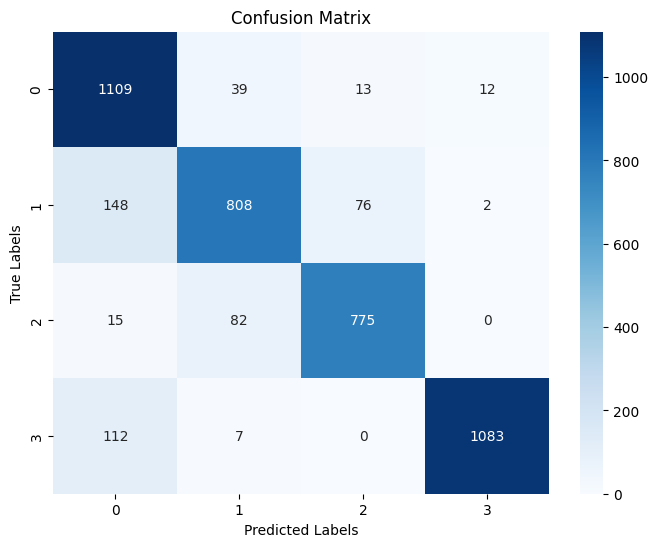

In [25]:
# Dummy input data
num_samples = 4281
sequence_length = 53  # Equivalent to your previous `input_dim`
num_classes = 4

# Define the CNN model
def create_cnn_model(filters=32, kernel_size=3, pool_size=2, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential([
        Conv1D(filters, kernel_size, activation='relu', input_shape=(sequence_length, 1)),
        MaxPooling1D(pool_size=pool_size),
        Dropout(dropout_rate),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

# Create the CNN model
cnn_model = create_cnn_model()

# Display the model summary
cnn_model.summary()

# Reshape input to 3D tensor for CNN
new_X_scaled1_reshaped = new_X_scaled1.reshape(-1, sequence_length, 1)

# Train the CNN model
history = cnn_model.fit(
    x=new_X_scaled1_reshaped,
    y=new_y,
    batch_size=32,
    epochs=25,
    validation_split=0.2
)

# Evaluate the model
final_accuracy = cnn_model.evaluate(new_X_scaled1_reshaped, new_y, verbose=0)
print(f"Final Accuracy: {final_accuracy[1]:.4f}")

# Save model after training
cnn_model.save('models/cnn_new_dataset_model.h5')

new_y_pred = cnn_model.predict(new_X_scaled1_reshaped)
new_y_pred_classes = np.argmax(new_y_pred, axis=1)  # Convert predictions to class labels (0, 1, 2, or 3)

# Compute confusion matrix
new_cm = confusion_matrix(new_y, new_y_pred_classes)

# Calculate accuracy directly
accuracy = accuracy_score(new_y, new_y_pred_classes)
print(f"Accuracy: {accuracy:.2f}")

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(new_cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3], cbar=True)

# Labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

# MLP

/Users/nehakolambe/Library/Python/3.9/lib/python/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,084 (55.02 KB)

 Trainable params: 14,084 (55.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4813 - loss: 1.1951 - val_accuracy: 0.8903 - val_loss: 0.3706
Epoch 2/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7410 - loss: 0.6367 - val_accuracy: 0.9195 - val_loss: 0.2057
Epoch 3/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.7736 - loss: 0.5469 - val_accuracy: 0.9673 - val_loss: 0.1172
Epoch 4/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7968 - loss: 0.4963 - val_accuracy: 0.9300 - val_loss: 0.2012
Epoch 5/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8097 - loss: 0.4898 - val_accuracy: 0.9755 - val_loss: 0.0998
Epoch 6/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.7994 - loss: 0.4830 - val_accuracy: 0.9440 - val_loss: 0.1714
Epoch 7/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.8161 - loss: 0.4518 - val_accuracy: 0.9522 - val_loss: 0.1421
Epoch 8/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8179 - loss: 0.4539 - val_accuracy: 0.9323 - val

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step
Accuracy: 0.89


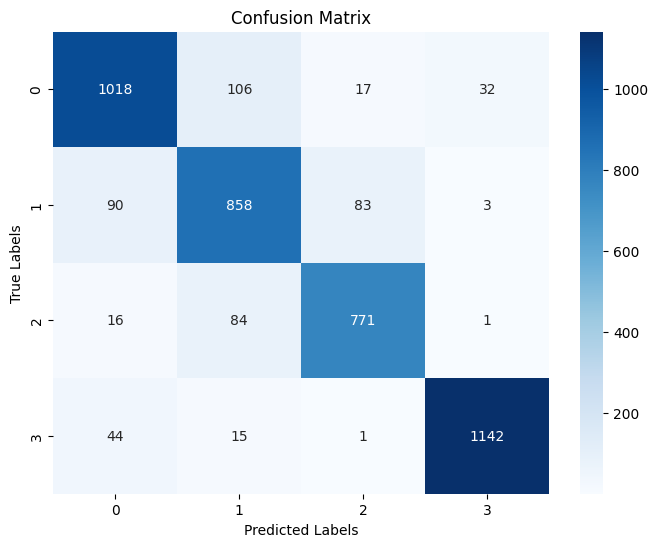

In [26]:
sequence_length = 10
num_classes = 4

# Define the MLP model
mlp_model = Sequential()

# Flatten the input to convert it into a single vector
mlp_model.add(Flatten(input_shape=(sequence_length, 1)))

# First Dense Layer
mlp_model.add(Dense(128, activation='relu'))  # Equivalent to the first Conv1D layer
mlp_model.add(Dropout(0.2))

# Second Dense Layer
mlp_model.add(Dense(64, activation='relu'))  # Equivalent to the second Conv1D layer
mlp_model.add(Dropout(0.2))

# Third Dense Layer
mlp_model.add(Dense(64, activation='relu'))  # Equivalent to the dense layer in CNN
mlp_model.add(Dropout(0.2))

# Output Layer for multi-class classification
mlp_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
mlp_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
mlp_model.summary()

# Reshape input data to match the MLP input format
original_X_scaled1 = original_X_scaled1.reshape((-1, sequence_length, 1))

# Train the model
mlp_model.fit(original_X_scaled1, original_y, epochs=25, batch_size=64, validation_split=0.2)

# Save model after training
mlp_model.save('models/mlp_old_dataset_model.h5')

original_y_pred = mlp_model.predict(original_X_scaled1)
original_y_pred_classes = np.argmax(original_y_pred, axis=1)  # Convert predictions to class labels (0, 1, 2, or 3)

# Compute confusion matrix
original_cm = confusion_matrix(original_y, original_y_pred_classes)

# Calculate accuracy directly
accuracy = accuracy_score(original_y, original_y_pred_classes)
print(f"Accuracy: {accuracy:.2f}")

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(original_cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3], cbar=True)

# Labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

/Users/nehakolambe/Library/Python/3.9/lib/python/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 53)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │         6,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,428 (60.27 KB)

 Trainable params: 15,428 (60.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5203 - loss: 1.1172 - val_accuracy: 0.8203 - val_loss: 0.5023
Epoch 2/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.7406 - loss: 0.6265 - val_accuracy: 0.8366 - val_loss: 0.4430
Epoch 3/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - accuracy: 0.7861 - loss: 0.5280 - val_accuracy: 0.8798 - val_loss: 0.3241
Epoch 4/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.7834 - loss: 0.5174 - val_accuracy: 0.9032 - val_loss: 0.2414
Epoch 5/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.8074 - loss: 0.4758 - val_accuracy: 0.8786 - val_loss: 0.2800
Epoch 6/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.8097 - loss: 0.4656 - val_accuracy: 0.8821 - val_loss: 0.2706
Epoch 7/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.8194 - loss: 0.4326 - val_accuracy: 0.8716 - val_loss: 0.3073
Epoch 8/25
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - accuracy: 0.8281 - loss: 0.4142 - va

Final Accuracy: 0.9192
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step
Accuracy: 0.92


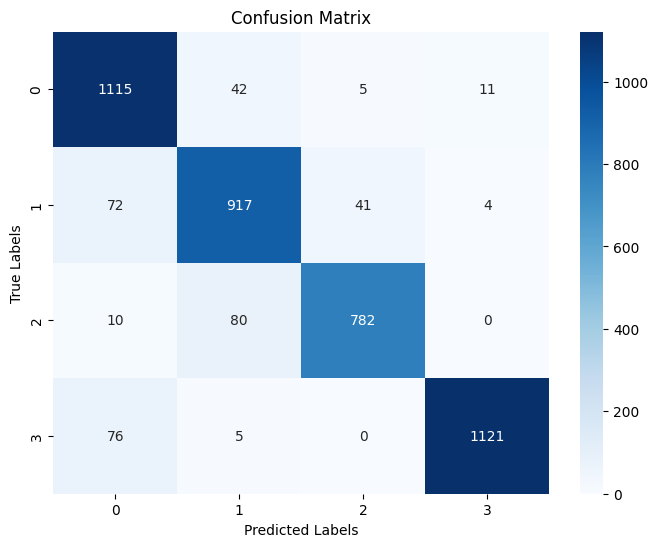

In [27]:
sequence_length = 53

# Define the MLP model
def create_mlp_model(hidden_units1=128, hidden_units2=64, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential([
        Flatten(input_shape=(sequence_length, 1)),  # Flatten the input
        Dense(hidden_units1, activation='relu'),   # First Dense Layer
        Dropout(dropout_rate),
        Dense(hidden_units2, activation='relu'),   # Second Dense Layer
        Dropout(dropout_rate),
        Dense(num_classes, activation='softmax')   # Output Layer
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

# Create the MLP model
mlp_model = create_mlp_model()

# Display the model summary
mlp_model.summary()

# Reshape input to match the MLP input format
new_X_scaled1_reshaped = new_X_scaled1.reshape(-1, sequence_length, 1)

# Train the MLP model
history = mlp_model.fit(
    x=new_X_scaled1_reshaped,
    y=new_y,
    batch_size=32,
    epochs=25,
    validation_split=0.2
)

# Evaluate the model
final_accuracy = mlp_model.evaluate(new_X_scaled1_reshaped, new_y, verbose=0)
print(f"Final Accuracy: {final_accuracy[1]:.4f}")

# Save model after training
mlp_model.save('models/mlp_new_dataset_model.h5')

new_y_pred = mlp_model.predict(new_X_scaled1_reshaped)
new_y_pred_classes = np.argmax(new_y_pred, axis=1)  # Convert predictions to class labels (0, 1, 2, or 3)

# Compute confusion matrix
new_cm = confusion_matrix(new_y, new_y_pred_classes)

# Calculate accuracy directly
accuracy = accuracy_score(new_y, new_y_pred_classes)
print(f"Accuracy: {accuracy:.2f}")

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(new_cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3], cbar=True)

# Labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

# GRU

/Users/nehakolambe/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 10, 128)        │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,972 (359.27 KB)

 Trainable params: 91,972 (359.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4113 - loss: 1.2812 - val_accuracy: 0.4154 - val_loss: 1.2395
Epoch 2/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5534 - loss: 0.9756 - val_accuracy: 0.7806 - val_loss: 0.7313
Epoch 3/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6029 - loss: 0.8873 - val_accuracy: 0.7386 - val_loss: 0.8703
Epoch 4/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6762 - loss: 0.7777 - val_accuracy: 0.7585 - val_loss: 0.7321
Epoch 5/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7132 - loss: 0.6878 - val_accuracy: 0.8215 - val_loss: 0.4843
Epoch 6/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7585 - loss: 0.6195 - val_accuracy: 0.8145 - val_loss: 0.4858
Epoch 7/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7503 - loss: 0.6106 - val_accuracy: 0.8938 - val_loss: 0.2690
Epoch 8/25
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7567 - loss: 0.6052 - val_accuracy: 0.8635 - val_loss

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.83


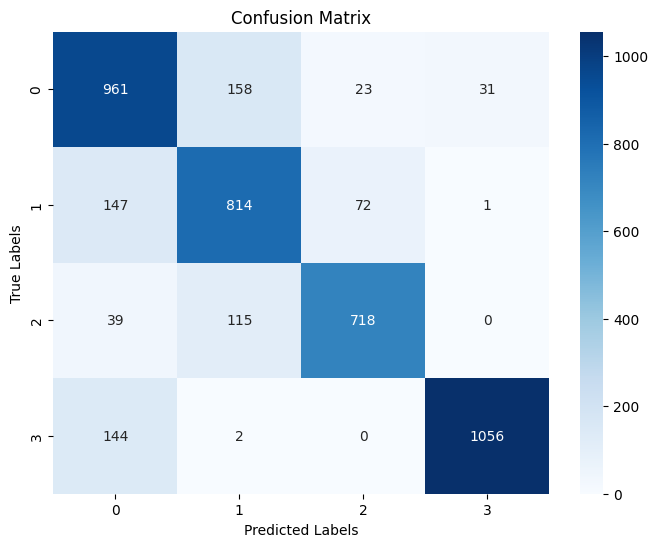

In [28]:
sequence_length = 10
num_classes = 4

# Define the GRU model
gru_model = Sequential()

# First GRU Layer
gru_model.add(GRU(128, activation='tanh', input_shape=(sequence_length, 1), return_sequences=True))
gru_model.add(Dropout(0.2))

# Second GRU Layer
gru_model.add(GRU(64, activation='tanh', return_sequences=False))
gru_model.add(Dropout(0.2))

# Fully Connected Dense Layer
gru_model.add(Dense(64, activation='relu'))
gru_model.add(Dropout(0.2))

# Output Layer for multi-class classification
gru_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
gru_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
gru_model.summary()

# Train the model
gru_model.fit(original_X_scaled1, original_y, epochs=25, batch_size=64, validation_split=0.2)

# Save model after training
gru_model.save('models/gru_old_dataset_model.h5')

original_y_pred = gru_model.predict(original_X_scaled1)
original_y_pred_classes = np.argmax(original_y_pred, axis=1)  # Convert predictions to class labels (0, 1, 2, or 3)

# Compute confusion matrix
original_cm = confusion_matrix(original_y, original_y_pred_classes)

# Calculate accuracy directly
accuracy = accuracy_score(original_y, original_y_pred_classes)
print(f"Accuracy: {accuracy:.2f}")

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(original_cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3], cbar=True)

# Labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

/Users/nehakolambe/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                     │ (None, 53, 256)        │       198,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 53, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 53, 128)        │       148,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 53, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_4 (GRU)                     │ (None, 53, 64)         │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 53, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 256)            │         8,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 443,652 (1.69 MB)

 Trainable params: 443,652 (1.69 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - accuracy: 0.3611 - loss: 1.2144 - val_accuracy: 0.8016 - val_loss: 0.5945
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - accuracy: 0.4652 - loss: 1.0601 - val_accuracy: 0.8751 - val_loss: 0.4509
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - accuracy: 0.5121 - loss: 1.0254 - val_accuracy: 0.6768 - val_loss: 0.8657
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - accuracy: 0.5783 - loss: 0.9402 - val_accuracy: 0.7853 - val_loss: 0.5763
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - accuracy: 0.5689 - loss: 0.9330 - val_accuracy: 0.8285 - val_loss: 0.5261
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - accuracy: 0.5833 - loss: 0.9405 - val_accuracy: 0.4084 - val_loss: 1.2469
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - accuracy: 0.6117 - loss: 0.9182 - val_accuracy: 0.7293 - val_loss: 0.7631
Epoch 8/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - accuracy: 0.6033 - loss: 0.9013 - val_accu

Final Accuracy: 0.7933
134/134 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step
Accuracy: 0.79


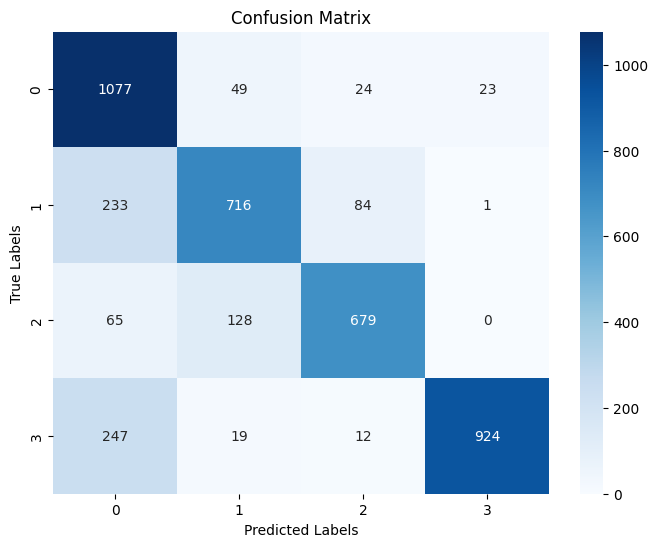

In [29]:
sequence_length = 53

# Define the enhanced GRU model
def create_gru_model(units1=256, units2=128, units3=64, units4=32, dropout_rate=0.3, learning_rate=0.001):
    model = Sequential([
        # First GRU Layer
        GRU(units1, activation='tanh', input_shape=(sequence_length, 1), return_sequences=True),
        Dropout(dropout_rate),

        # Second GRU Layer
        GRU(units2, activation='tanh', return_sequences=True),
        Dropout(dropout_rate),

        # Third GRU Layer
        GRU(units3, activation='tanh', return_sequences=True),
        Dropout(dropout_rate),

        # Fourth GRU Layer
        GRU(units4, activation='tanh', return_sequences=False),
        Dropout(dropout_rate),

        # Fully Connected Dense Layers
        Dense(256, activation='relu'),
        Dropout(dropout_rate),
        
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        
        Dense(64, activation='relu'),
        Dropout(dropout_rate),

        # Output Layer for multi-class classification
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

# Create the enhanced GRU model
enhanced_gru_model = create_gru_model()

# Display the model summary
enhanced_gru_model.summary()

# Reshape input to 3D tensor for GRU
new_X_scaled1_reshaped = new_X_scaled1.reshape(-1, sequence_length, 1)

# Train the GRU model
history = enhanced_gru_model.fit(
    x=new_X_scaled1_reshaped,
    y=new_y,
    batch_size=32,
    epochs=50,  # Increased epochs for better convergence
    validation_split=0.2
)

# Evaluate the model
final_accuracy = enhanced_gru_model.evaluate(new_X_scaled1_reshaped, new_y, verbose=0)
print(f"Final Accuracy: {final_accuracy[1]:.4f}")

# Save model after training
enhanced_gru_model.save('models/gru_new_dataset_model.h5')

new_y_pred = enhanced_gru_model.predict(new_X_scaled1_reshaped)
new_y_pred_classes = np.argmax(new_y_pred, axis=1)  # Convert predictions to class labels (0, 1, 2, or 3)

# Compute confusion matrix
new_cm = confusion_matrix(new_y, new_y_pred_classes)

# Calculate accuracy directly
accuracy = accuracy_score(new_y, new_y_pred_classes)
print(f"Accuracy: {accuracy:.2f}")

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(new_cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3], cbar=True)

# Labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()